# Beginner

## Task 02: Detect potential plagiarism in a medieval chronicle by comparing it to other sources.

Manually examine the text for phrases or passages that appear unusually similar to other chronicles of the same period. The script aims to identify and quantify similarities between a medieval chronicle and several source texts. It focuses on finding similar phrases, their degree of similarity, and how these similarities are distributed across different source texts. This could be useful for historical research, plagiarism detection, or understanding how information was transmitted and adapted in the past.

Hints:
- Look for identical or nearly identical sentences or paragraphs.
- Consider the historical context; some similarities may be due to common sources or shared knowledge (Charters :_)).


**Steps**

1. **Libraries:**
   * `re`: Regular expressions for text cleaning.
   * `difflib.SequenceMatcher`: Calculates similarity between sequences of text.
   * `pandas`: Data manipulation and analysis.
   * `matplotlib.pyplot`: Creates the initial visualizations.
   * `seaborn`: Enhances visualizations for better aesthetics.

2. **Functions:**
   * `preprocess_text(text)`: Cleans text by converting to lowercase and removing punctuation.
   * `find_similar_phrases(text1, text2, min_length, similarity_threshold)`:
      - Splits texts into words.
      - Iterates over possible phrases of at least `min_length`.
      - Calculates similarity using `SequenceMatcher.ratio()`.
      - Returns similar phrases exceeding the `similarity_threshold`.
   * `highlight_phrases_in_context(text, phrase, context_words)`:
      - Attempts to find the best match of the phrase within the text, taking context into account.
      - Returns the highlighted phrase in context if found, along with its match ratio.

3. **Data Preparation:**
   * Placeholder text variables (`chronicle`, `source1`, etc.) would be replaced with the actual contents of your historical texts.
   * Texts are preprocessed.

4. **Similarity Analysis:**
   * `find_similar_phrases` is called for each pair of chronicle and source text.
   * Results are combined and organized into a DataFrame (`df`).

5. **Data Exploration:**
   * The top 10 most similar phrases are printed.
   * A histogram visualizes the distribution of similarity scores across sources.
   * Overall similarity scores (averages) are calculated and displayed, both numerically and as a bar chart.

6. **Contextual Display:**
   * For the top 10 phrases, the script tries to locate them in their original context within the chronicle and the source text.
   * It prints the context surrounding each phrase, along with the match ratio for better understanding.

**Key Improvements and Features**

* **Contextualization:**  The `highlight_phrases_in_context` function goes beyond simply identifying similar phrases; it helps you see how they're used within their original texts.
* **Enhanced Visualization:** Seaborn is used to make the plots more visually appealing and informative.
* **Increased Examples:** The number of top phrases displayed in context is increased from 5 to 10 for richer analysis.
* **Bar Chart Added:** An additional bar chart clearly shows the overall similarity scores for each source.

**Interpretation**

The script provides insights into:

* **Specific Similarities:** Which exact phrases are shared between texts and how similar they are.
* **Distribution of Similarities:** How the similarity scores are spread out, giving a sense of whether similarities are concentrated or dispersed.
* **Overall Similarity:** How similar the chronicle is to each source text on average.
* **Contextual Usage:**  How the similar phrases are used in their original context, potentially revealing nuances in meaning or adaptation.

                   Chronicle Phrase                    Source Phrase  \
4          on the field of hastings   on the battlefield of hastings   
5        the field of hastings they  the battlefield of hastings the   
8           red in the end williams          but in the end williams   
10           and harold lay dead an         and harold lay dead thus   
2     the saxon king harold hearing     the saxon king harold rushed   
9   the end williams norman knights      in the end williams knights   
6        the field of hastings they  battlefield of hastings the two   
7        field of hastings they met  battlefield of hastings the two   
0              cross the sea with a        across the channel with a   
1        host the saxon king harold    england the saxon king harold   

    Similarity    Source  
4     0.888889  Source 2  
5     0.877193  Source 2  
8     0.869565  Source 2  
10    0.869565  Source 3  
2     0.842105  Source 2  
9     0.827586  Source 2  
6     0.807018  So

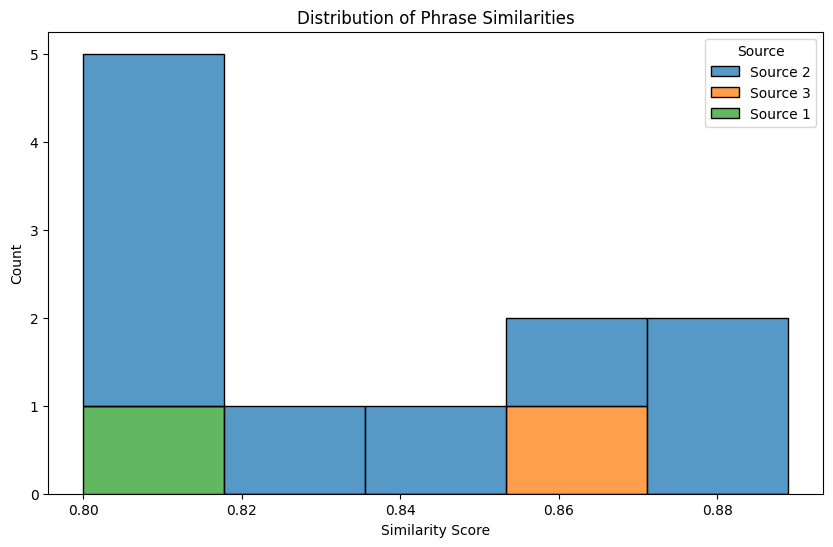


Overall similarity scores:
Source
Source 1    0.800000
Source 2    0.835486
Source 3    0.869565
Name: Similarity, dtype: float64


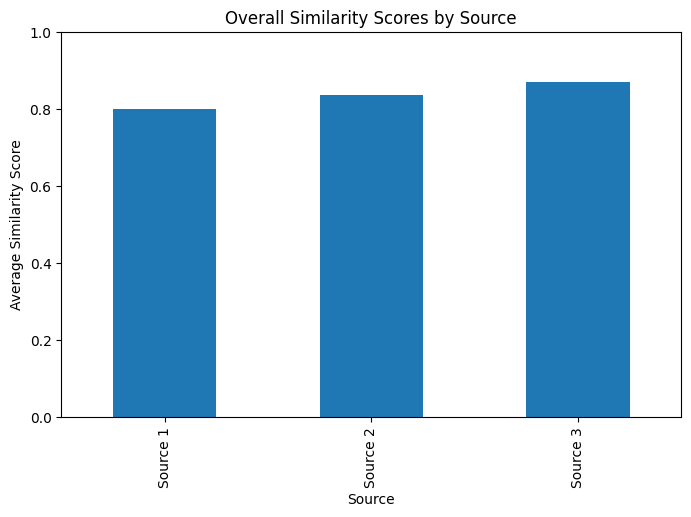


Top similar phrases in context:

Similarity: 0.89
Chronicle: marched south with great haste. ** On the field of Hastings, ** they met in fierce battle.
Match ratio in context: 0.98
Source (Source 2): on the battlefield of hastings
--------------------------------------------------

Similarity: 0.88
Chronicle: south with great haste. On ** the field of Hastings, they ** met in fierce battle. Many
Match ratio in context: 0.98
Source (Source 2): the battlefield of hastings the
--------------------------------------------------

Similarity: 0.87
Chronicle: their blood staining the earth ** red. In the end, William's ** Norman knights prevailed, and Harold
Match ratio in context: 0.94
Source (Source 2): but in the end williams
--------------------------------------------------

Similarity: 0.87
Chronicle: end, William's Norman knights prevailed, ** and Harold lay dead, an ** arrow in his eye. Thus
Match ratio in context: 0.98
Source (Source 3): and harold lay dead thus
--------------------

In [ ]:
import re
from difflib import SequenceMatcher
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    return re.sub(r'[^\w\s]', '', text.lower())

# Function to find similar phrases
def find_similar_phrases(text1, text2, min_length=5, similarity_threshold=0.8):
    words1, words2 = text1.split(), text2.split()

    phrases1 = [' '.join(words1[i:i+min_length]) for i in range(len(words1) - min_length + 1)]
    phrases2 = "SOMETHING IS MISSING"

    similarities = [(phrase1, phrase2, SequenceMatcher(None, phrase1, phrase2).ratio())
                    for phrase1 in phrases1 for phrase2 in phrases2
                    if SequenceMatcher(None, phrase1, phrase2).ratio() >= similarity_threshold]

    return similarities


# Some medieval chronicle and source texts, TRY TO IMPLEMENT MORE SOURCES
chronicle = """
In the year of our Lord 1066, William the Conqueror did cross the sea with a mighty host. The Saxon king Harold, hearing of this invasion, marched south with great haste. On the field of Hastings, they met in fierce battle. Many brave warriors fell that day, their blood staining the earth red. In the end, William's Norman knights prevailed, and Harold lay dead, an arrow in his eye. Thus did William claim the crown of England, and a new age began.
"""

source1 = """
It came to pass in 1066 that Duke William of Normandy sailed across the channel with a great army. King Harold of the Saxons, learning of this threat, hurried south to meet the invaders. At Hastings, a terrible battle was fought, where countless men lost their lives. William's forces emerged victorious, and Harold was slain, struck down by an arrow. So did William become king of England, ushering in Norman rule.
"""

source2 = """
The chronicles tell us that in the year 1066, William of Normandy launched his invasion of England. The Saxon king Harold rushed to defend his realm. On the battlefield of Hastings, the two armies clashed in a day of blood and valor. Many fell on both sides, but in the end, William's knights broke through. Harold was killed, and William took the throne, forever changing the course of English history.
"""

source3 = """
Let it be known that Anno Domini 1066 saw great upheaval in the land of England. For William, Duke of Normandy, did set sail with a host of warriors to claim the English crown. King Harold of the Saxons met him at Hastings, where a mighty battle was joined. The field ran red with the blood of fallen heroes. As the day waned, William stood triumphant, and Harold lay dead. Thus began the reign of William the Conqueror.
"""

# Preprocess texts
chronicle_processed = preprocess_text(chronicle)
source1_processed = preprocess_text(source1)
source2_processed = preprocess_text(source2)
source3_processed = preprocess_text(source3)

# Find similar phrases
similar_phrases1 = find_similar_phrases(chronicle_processed, source1_processed)
similar_phrases2 = find_similar_phrases(chronicle_processed, source2_processed)
similar_phrases3 = find_similar_phrases(chronicle_processed, source3_processed)

# Combine results
all_similar_phrases = similar_phrases1 + similar_phrases2 + similar_phrases3

# Create a DataFrame for easier analysis
df = pd.DataFrame(all_similar_phrases, columns=['Chronicle Phrase', 'Source Phrase', 'Similarity'])
df['Source'] = ['Source 1'] * len(similar_phrases1) + ['Source 2'] * len(similar_phrases2) + ['Source 3'] * len(similar_phrases3)

# Sort by similarity in descending order
df = df.sort_values('Similarity', ascending=False)

# Display the top similar phrases
print(df.head(10))

# Visualize the distribution of similarities
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Similarity', hue='Source', multiple='stack')
plt.title('Distribution of Phrase Similarities')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.show()

# Calculate and display overall similarity scores
overall_similarities = df.groupby('Source')['Similarity'].mean()
print("\nOverall similarity scores:")
print(overall_similarities)

# Visualize overall similarities
plt.figure(figsize=(8, 5))
overall_similarities.plot(kind='bar')
plt.title('Overall Similarity Scores by Source')
plt.xlabel('Source')
plt.ylabel('Average Similarity Score')
plt.ylim(0, 1)
plt.show()

# Function to highlight similar phrases in context
def highlight_phrases_in_context(text, phrase, context_words=5):
    words = text.split()
    phrase_words = phrase.lower().split()
    best_match = None
    best_match_ratio = 0

    for i in range(len(words) - len(phrase_words) + 1):
        window = ' '.join(words[i:i+len(phrase_words)]).lower()
        ratio = SequenceMatcher(None, window, phrase.lower()).ratio()
        if ratio > best_match_ratio:
            best_match_ratio = ratio
            best_match = i

    if best_match is not None and best_match_ratio > 0.8:  # Adjust this threshold as needed
        start = max(0, best_match - context_words)
        end = min(len(words), best_match + len(phrase_words) + context_words)
        return ' '.join(words[start:best_match] + ['**'] + words[best_match:best_match+len(phrase_words)] + ['**'] + words[best_match+len(phrase_words):end]), best_match_ratio
    return None, 0

# Display similar phrases in context for the top matches
top_phrases = df.head(10)  # Increased to top 10 for more examples
print("\nTop similar phrases in context:")
for _, row in top_phrases.iterrows():
    context, match_ratio = highlight_phrases_in_context(chronicle, row['Chronicle Phrase'])
    print(f"\nSimilarity: {row['Similarity']:.2f}")
    if context:
        print(f"Chronicle: {context}")
        print(f"Match ratio in context: {match_ratio:.2f}")
    else:
        print(f"Chronicle: Phrase not found in context")
    print(f"Source ({row['Source']}): {row['Source Phrase']}")
    print("-" * 50)

## Solution

1: `phrases2 = [' '.join(words2[j:j+min_length]) for j in range(len(words2) - min_length + 1)]`